In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
filepath = "proj1Dataset.xlsx"
df  = pd.read_excel(filepath)

In [162]:
df.describe()

,Weight,Horsepower
count,406.000000,400.000000
mean,2979.413793,105.082500
std,847.004328,38.768779
min,1613.000000,46.000000
25%,2226.500000,75.750000
50%,2822.500000,95.000000
75%,3618.250000,130.000000
max,5140.000000,230.000000


In [163]:
df.head()

,Weight,Horsepower
0,3504,130.0
1,3693,165.0
2,3436,150.0
3,3433,150.0
4,3449,140.0


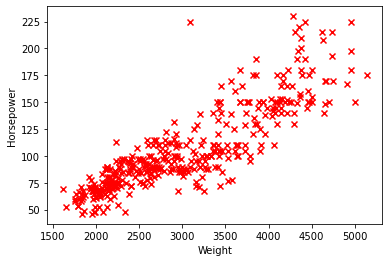

In [164]:
df_plot = plt.scatter(x=df['Weight'],y=df['Horsepower'],c='red',marker='x')
df_plot = plt.xlabel("Weight")
df_plot = plt.ylabel("Horsepower")
df_plot = plt.show()

In [165]:
rows = df['Weight'].shape[0]
features = np.array(df['Weight'])
# create matrix of shape N x D
features = np.reshape(features, (rows, 1))
X0 = np.ones((rows,1))
features.shape

(406, 1)

In [166]:
# create design matrix of shape N x D+1
design_matrix = np.hstack((features, X0))
design_matrix.shape

(406, 2)

In [167]:
pseudoinverse = np.linalg.pinv(design_matrix)
pseudoinverse.shape

(2, 406)

In [168]:
t = df['Horsepower']
t = pd.DataFrame(t, columns=["Horsepower"])
t = t.fillna(0)
t.shape

(406, 1)

In [169]:
W = np.matmul(pseudoinverse, t)
W

,Horsepower
0,0.040224
1,-16.315434


In [170]:
Y = np.dot(design_matrix,W)
Y.shape

(406, 1)

Text(0.5, 1.0, "Matlab's 'carbig' dataset ")

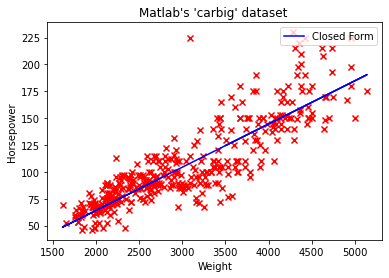

In [171]:
plt.scatter(df['Weight'], df['Horsepower'],c='red',marker='x')
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.plot(df['Weight'], Y, c='b',label='Closed Form')
plt.legend(loc='upper right')
plt.title("Matlab's 'carbig' dataset ")